In [1]:
import pykoopman as pk
import numpy as np
import numpy.random as rnd
np.random.seed(42)  # for reproducibility
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pykoopman.common import slow_manifold
nonlinear_sys = slow_manifold(mu=-0.1, la=-1.0, dt=0.1)

In [2]:
n_int = 1
n_pts = 51
xmin = ymin = -2
xmax = ymax = +2
xx, yy = np.meshgrid(np.linspace(xmin, xmax, n_pts), np.linspace(ymin, ymax, n_pts))
Xdat = np.vstack((xx.flatten(), yy.flatten()))

X, Y = nonlinear_sys.collect_data_discrete(Xdat, n_int)

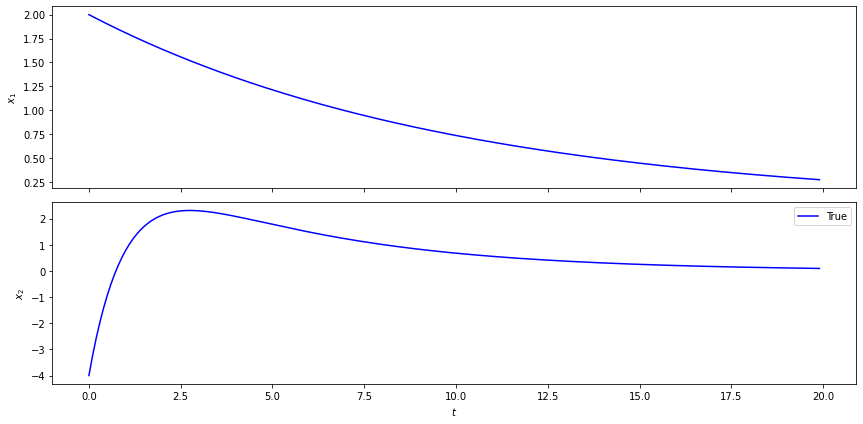

In [3]:
x0 = np.array([2, -4])  #np.array([2, -4])
T = 20
t = np.arange(0, T, nonlinear_sys.dt)
Xtest = nonlinear_sys.simulate(x0[:, np.newaxis], len(t)-1).T
Xtest = np.vstack([x0[np.newaxis, :], Xtest])
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize=(12, 6))
axs[0].plot(t, Xtest[:, 0], '-', color='blue', label='True')
axs[0].set(ylabel=r'$x_1$')
axs[1].plot(t, Xtest[:, 1], '-', color='blue', label='True')
axs[1].set(ylabel=r'$x_2$', xlabel=r'$t$')
axs[1].legend(loc='best')

In [4]:
regr = pk.regression.KEF()
obsv = pk.observables.Polynomial(degree=3)
model = pk.Koopman(observables=obsv, regressor=regr)
model.fit(X.T, y=Y.T, dt=nonlinear_sys.dt)

Koopman(observables=Polynomial(degree=3), regressor=KEF())

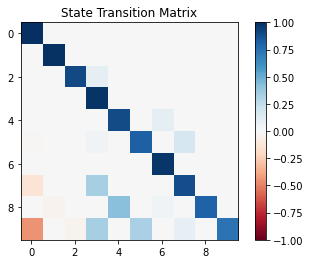

In [5]:
fig = plt.figure()
ax0 = plt.subplot(111)
im = ax0.imshow(model.state_transition_matrix, aspect='equal', cmap=plt.get_cmap
('RdBu'), vmin=-1, vmax=1)
ax0.set(title='State Transition Matrix')
fig.colorbar(im, ax=ax0)

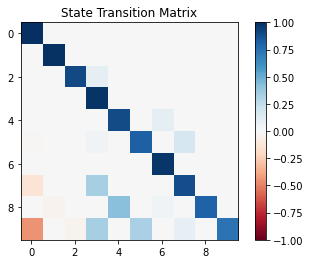

In [6]:
# model.reduce(t=t, x=Xtest, rank=8)
# model.reduce(t=t, x=Xtest)

fig = plt.figure()
ax0 = plt.subplot(111)
im = ax0.imshow(model.state_transition_matrix, aspect='equal', cmap=plt.get_cmap
('RdBu'), vmin=-1, vmax=1)
ax0.set(title='State Transition Matrix')
fig.colorbar(im, ax=ax0)

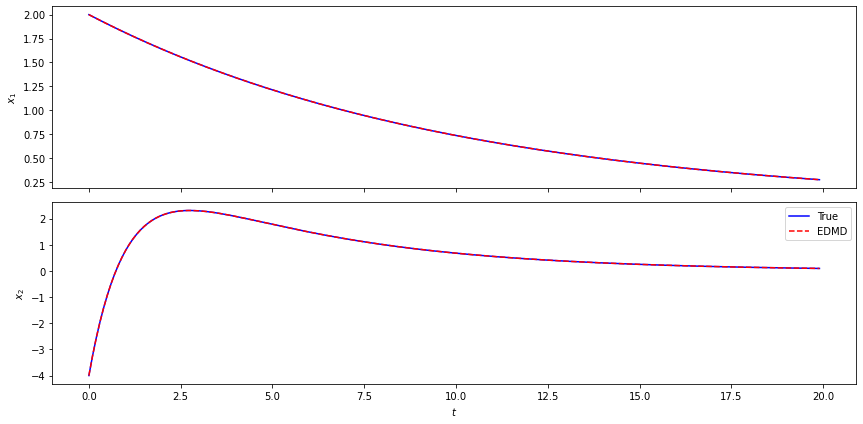

In [7]:
Xkoop = model.simulate(x0[np.newaxis, :], n_steps=len(t)-1)
Xkoop = np.vstack([x0[np.newaxis,:], Xkoop])

fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize=(12, 6))
axs[0].plot(t, Xtest[:, 0], '-', color='blue', label='True')
axs[0].plot(t, Xkoop[:, 0], '--r', label='EDMDc')
axs[0].set(ylabel=r'$x_1$')
axs[1].plot(t, Xtest[:, 1], '-', color='blue', label='True')
axs[1].plot(t, Xkoop[:, 1], '--r', label='EDMD')
axs[1].set(ylabel=r'$x_2$', xlabel=r'$t$')
axs[1].legend(loc='best')

In [8]:
# model.validate_model(t, Xtrue)

In [9]:
Ztest = np.real(obsv.transform(Xtest))

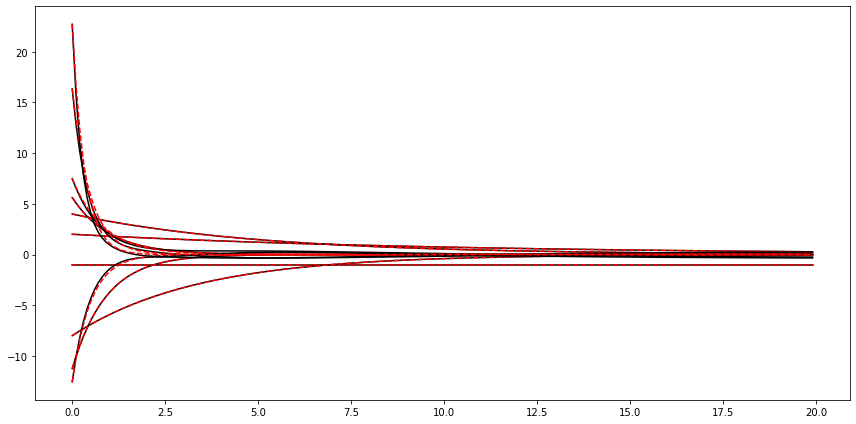

In [10]:
linearity_error = []
fig, axs = plt.subplots(1, 1, sharex=True, tight_layout=True, figsize=(12, 6))
for i in range(len(model.eigenvalues)):
    xi = model.eigenfunctions_projected[:, i]
    axs.plot(t, np.real(Ztest @ xi), '-', color='black', label='EF')
    axs.plot(t, np.real(np.exp(model.eigenvalues_continuous[i] * t) * (Ztest[0, :] @ xi)),'--r', label='EV')
    linearity_error.append(np.linalg.norm(np.real(Ztest @ xi) - np.real(np.exp(model.eigenvalues_continuous[i] * t) * (Ztest[0, :] @ xi))))

In [11]:
print(linearity_error)

[4.040611808501963e-12, 4.163576402648689e-13, 2.022117937797141e-12, 2.8649921225295204e-12, 3.0278808994476662e-12, 1.7283958850700073e-12, 2.811862686752406, 2.921482675764825, 2.8724449109627095, 4.077006062960236]
